<a href="https://colab.research.google.com/github/zulkernine/MachineLearning/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

In [0]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

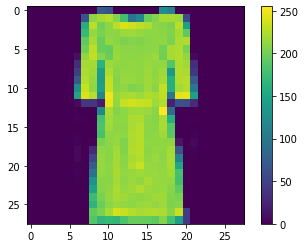

In [0]:
plt.figure()
plt.imshow(train_images[47])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0 

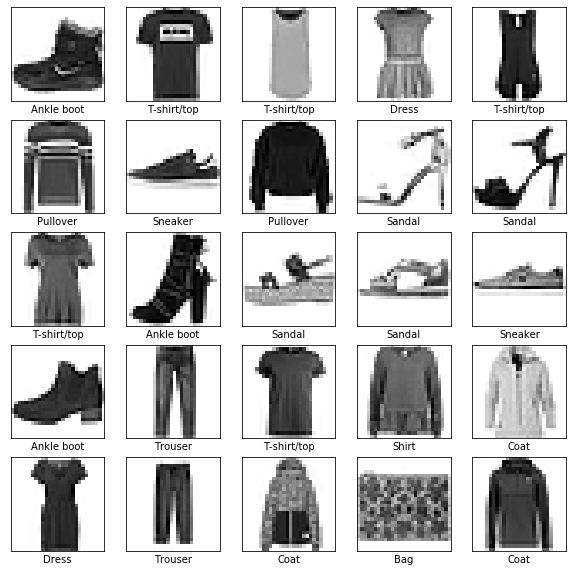

In [0]:
plt.figure(figsize=(10,10))
for x in range(25):
  plt.subplot(5,5,x+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[x], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[x]])
plt.show()

In [0]:
model=keras.Sequential([
                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 0.4916 - accuracy: 0.8273
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3776 - accuracy: 0.8649
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3367 - accuracy: 0.8777
Epoch 4/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3130 - accuracy: 0.8844
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2945 - accuracy: 0.8904
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2789 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2667 - accuracy: 0.9017
Epoch 8/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2551 - accuracy: 0.9042
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2485 - accuracy: 0.9067
Epoch 10/10
60

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy of the model is : ', test_acc)

10000/10000 - 0s - loss: 0.3358 - accuracy: 0.8795
Test accuracy of the model is :  0.8795


In [0]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

array([2.1906284e-05, 2.8049465e-09, 6.3594186e-08, 1.7350396e-09,
       1.1436708e-07, 2.6023176e-03, 1.0780578e-05, 4.5817286e-02,
       1.7465519e-08, 9.5154750e-01], dtype=float32)

In [0]:
np.argmax(predictions[6781])

1

In [0]:
test_labels[6781]

1

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

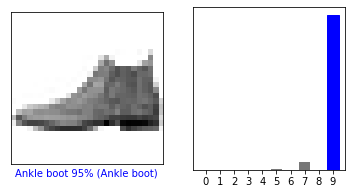

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

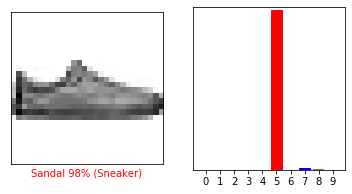

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

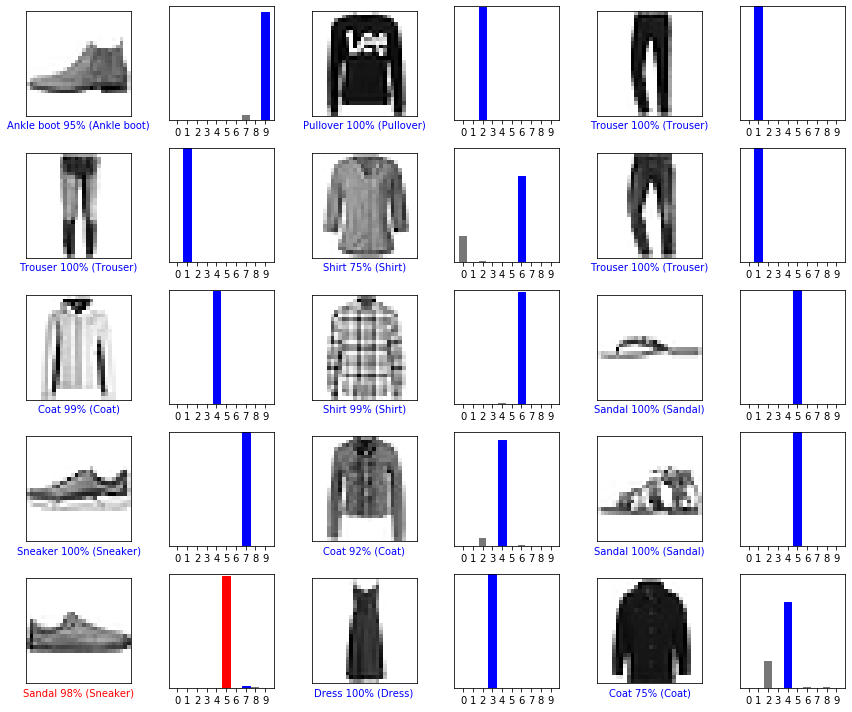

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [0]:
img = test_images[1]

print(img.shape)


(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [0]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.37104531e-05 1.14468016e-14 9.99028206e-01 6.77870958e-07
  4.12057474e-04 8.39613101e-13 4.95323911e-04 1.35199537e-14
  1.40831791e-08 8.20546062e-11]]


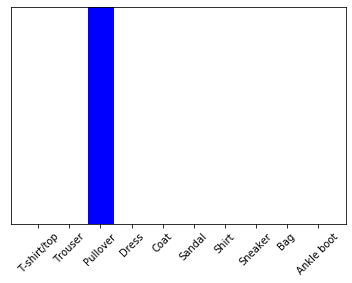

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [0]:
np.argmax(predictions_single[0])

2